<a href="https://colab.research.google.com/github/Enamulla577/EVAI/blob/main/Session12/AssignmentB/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import numpy as np
sns.set()
plt.style.use("dark_background")


In [2]:
!git clone https://github.com/Enamulla577/EVAI/

Cloning into 'EVAI'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 465 (delta 20), reused 0 (delta 0), pack-reused 354
Receiving objects: 100% (465/465), 20.67 MiB | 33.27 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [3]:
JSONFile = open('EVAI/Session12/AssignmentB/annotations.json')
data = json.loads(JSONFile.read())


In [4]:
BASE_DIR = 'EVAI/Session12/AssignmentB/'

In [5]:
print(json.dumps(data["image-1.jpg123053"], indent=2))

{
  "filename": "image-1.jpg",
  "size": 123053,
  "regions": [
    {
      "shape_attributes": {
        "name": "rect",
        "x": 249,
        "y": 194,
        "width": 58,
        "height": 41
      },
      "region_attributes": {
        "type": "hardhat",
        "image_quality": {
          "good": true,
          "frontal": true,
          "good_illumination": true
        }
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 512,
        "y": 143,
        "width": 60,
        "height": 45
      },
      "region_attributes": {
        "type": "hardhat",
        "image_quality": {
          "good": true,
          "frontal": true,
          "good_illumination": true
        }
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 640,
        "y": 130,
        "width": 57,
        "height": 41
      },
      "region_attributes": {
        "type": "hardhat",
        "image_quality": {
          "good": true,
    

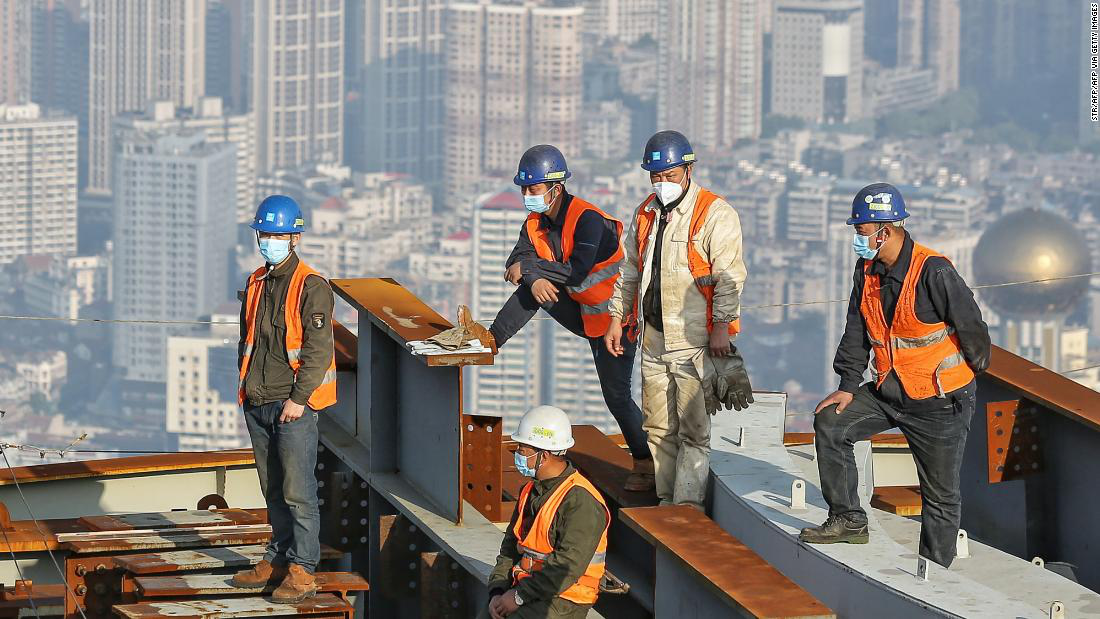

In [6]:
Image.open(os.path.join(BASE_DIR, "images", data["image-1.jpg123053"]["filename"]))

In [7]:
def get_bbox(img_annot):
    bboxes = []
    for bbox in img_annot["regions"]:
        shape_attrs = bbox["shape_attributes"]
        x = shape_attrs["x"]
        y = shape_attrs["y"]
        width = shape_attrs["width"]
        height = shape_attrs["height"]

        bboxes.append((x, y, width, height))

    return bboxes

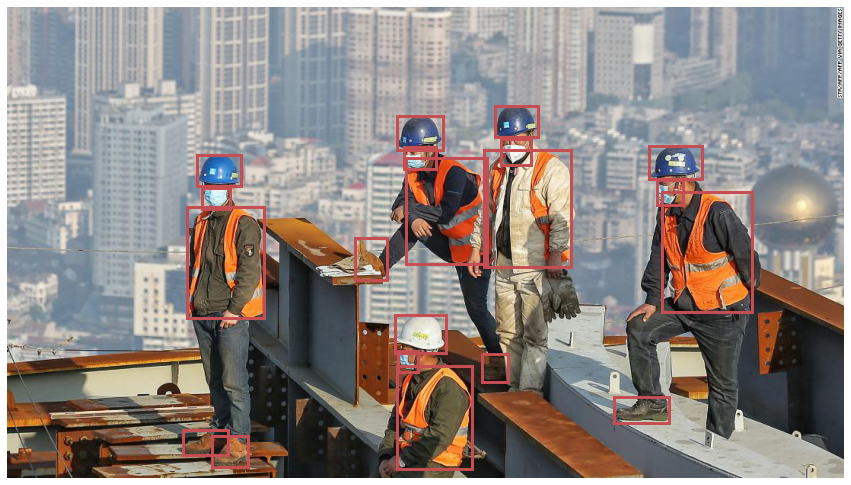

In [17]:
im = np.array(Image.open(os.path.join(BASE_DIR, "images", data["image-1.jpg123053"]["filename"])))
bboxes = get_bbox(data["image-1.jpg123053"])

# Create figure and axes
fig,ax = plt.subplots(1, figsize=(15,15))

# Display the image
ax.imshow(im)

for bbox in bboxes:
    x, y, width, height = bbox
    # Create a Rectangle patch
    rect = patches.Rectangle((x,y),width,height,linewidth=3,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.axis('off')
plt.show()

In [18]:
def get_bboxratio(img_annot):
    ratios = []
    img_width, img_height = Image.open(os.path.join(BASE_DIR, "images", img_annot["filename"])).size
    for bbox in get_bbox(img_annot):
        x, y, width, height = bbox
        ratios.append([width/img_width, height/img_height])
    return ratios

In [19]:
# bounding box ratio - bbox_width/img_width and bbox_height/img_height
bbratio = []
for img_annot in data.values():
    bbratio.extend(get_bboxratio(img_annot))

In [20]:
bbratio = np.array(bbratio)

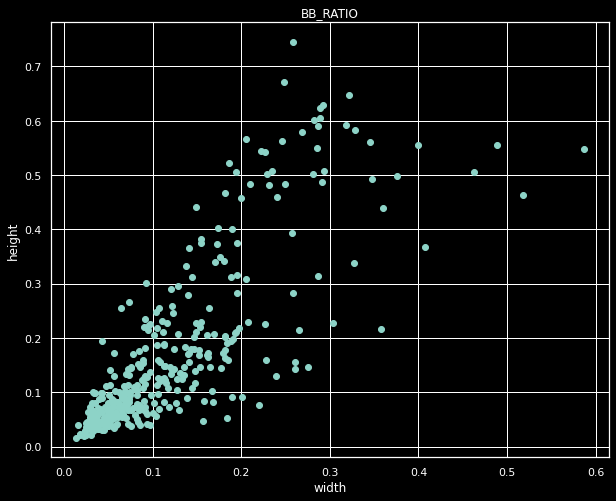

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], cmap="tab10")
plt.xlabel('width')
plt.ylabel('height')
plt.title('BB_RATIO')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

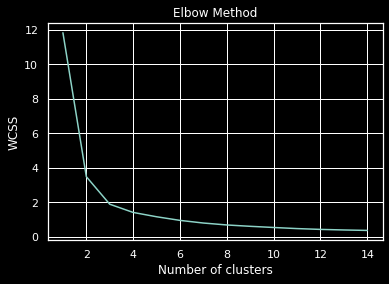

In [ ]:
wcss = []
for c in range(1, 15):
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bbratio)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

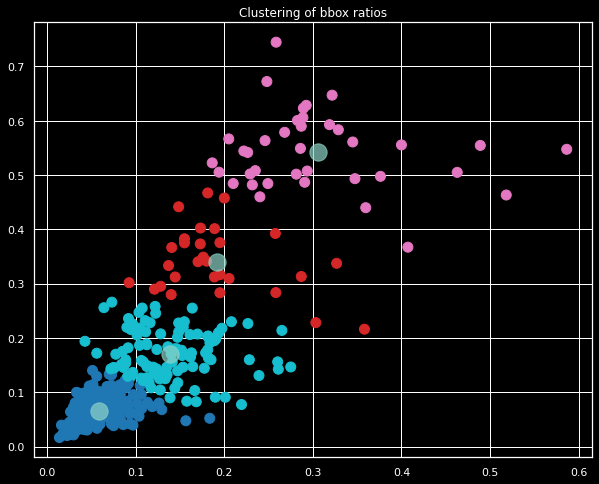

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bbratio)
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], c=pred_y, cmap="tab10", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=.7)
plt.title('Clustering of bbox ratios')
plt.show()

In [ ]:
json_formatted = json.dumps(data, indent=2)
print(json_formatted)

{
  "image-1.jpg123053": {
    "filename": "image-1.jpg",
    "size": 123053,
    "regions": [
      {
        "shape_attributes": {
          "name": "rect",
          "x": 249,
          "y": 194,
          "width": 58,
          "height": 41
        },
        "region_attributes": {
          "type": "hardhat",
          "image_quality": {
            "good": true,
            "frontal": true,
            "good_illumination": true
          }
        }
      },
      {
        "shape_attributes": {
          "name": "rect",
          "x": 512,
          "y": 143,
          "width": 60,
          "height": 45
        },
        "region_attributes": {
          "type": "hardhat",
          "image_quality": {
            "good": true,
            "frontal": true,
            "good_illumination": true
          }
        }
      },
      {
        "shape_attributes": {
          "name": "rect",
          "x": 640,
          "y": 130,
          "width": 57,
          "height": 41
       